<모델 개요>
1. “Diabetes Dataset”은 442명의 당뇨병 환자에 대한 진단 측정치로 구성되어 있으며, regression models를 위한 dataset임.
2. features를 통해 당뇨병의 진행 정도를 예측하는 모델.


<Dataset 특징>
샘플 수: 442 / feature 수: 10 / target: 1년 후 질병(당뇨병) 진행의 정량적 측정치

<Feature 종류>
1. age:나이
2. sex:성별
3. bmi:체질량 지수(Body Mass Index)
4. bp:평균 혈압(Average Blood Pressure)
5. s1:혈청(Serum) 측정치 1
6. s2:혈청 측정치 2
7. s3:혈청 측정치 3
8. s4:혈청 측정치 4
9. s5:혈청 측정치 5
10. s6:혈청 측정치 6

<데이터 형태>
모든 feature는 standardization(표준화)되어 있음(mean=0, std=1)


Mean=0: 각 feature에 대해 모든 값의 평균이 0이 되도록 변환된 상태. 모든 data가 원점을 기준으로 퍼져 있는 상태.

Standard Deviation=1: 각 feature의 값들이 평균으로부터 떨어져 있는 정도가 표준 편차 1로 조정된 상태. 평균에 가까운 값들과 멀리 있는 값들이 어느 정도 균일하게 퍼져 있게 만드는 효과.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# seaborn 패키지 = matplotlib에 기반을 둠. 그래프 스타일을 간편하게 커스터마이즈
# 데이터의 관계, 분포, 범주형 표현에서 강력함.
# matplotlib에서 구현하기 복잡한 시각화 작업을 더 쉽게 작성 가능함.

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# 데이터 로드
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
columns = diabetes.feature_names
data = pd.DataFrame(X, columns=columns)
data['target'] = y

1. EDA(Exploratory Data Analysis)

In [ ]:
# 데이터 기본 정보 확인 - 결측치 여부, 데이터 타입, 기초 통계 확인
# 데이터 구조 확인
print(data.info())

# 통계 요약
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.

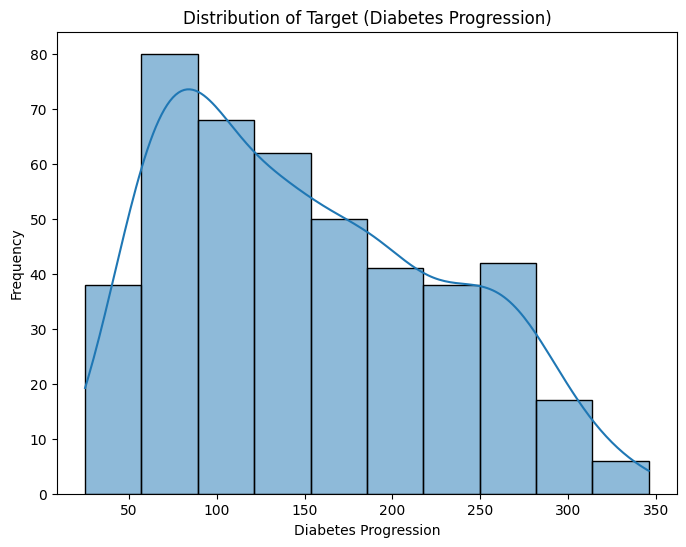

In [ ]:
# 타겟 변수 분포 확인
# 타켓의 분포를 확인하여 회귀 모델에서 예측하려는 목표값의 분포를 파악함.
plt.figure(figsize=(8, 6)) # figure size 설정함수(너비, 높이)
# figure = 그래프의 캔버스 역할
sns.histplot(data['target'], kde=True)
# hisplot = 히스토그램을 그림
# data['target'] = 하나의 열로 묶어진 target data를 의미함.
# kde = Kernel Density Estimation(커널밀도추정) = 곡선의 부드러움 정도를 조절함.
# 분포의 부드러운 추정 곡선을 히스토그램 위에 그릴 수 있음.
# 연속적인 분포를 시각화하는데 유용함.
plt.title('Distribution of Target (Diabetes Progression)')
plt.xlabel('Diabetes Progression')
plt.ylabel('Frequency')
plt.show()

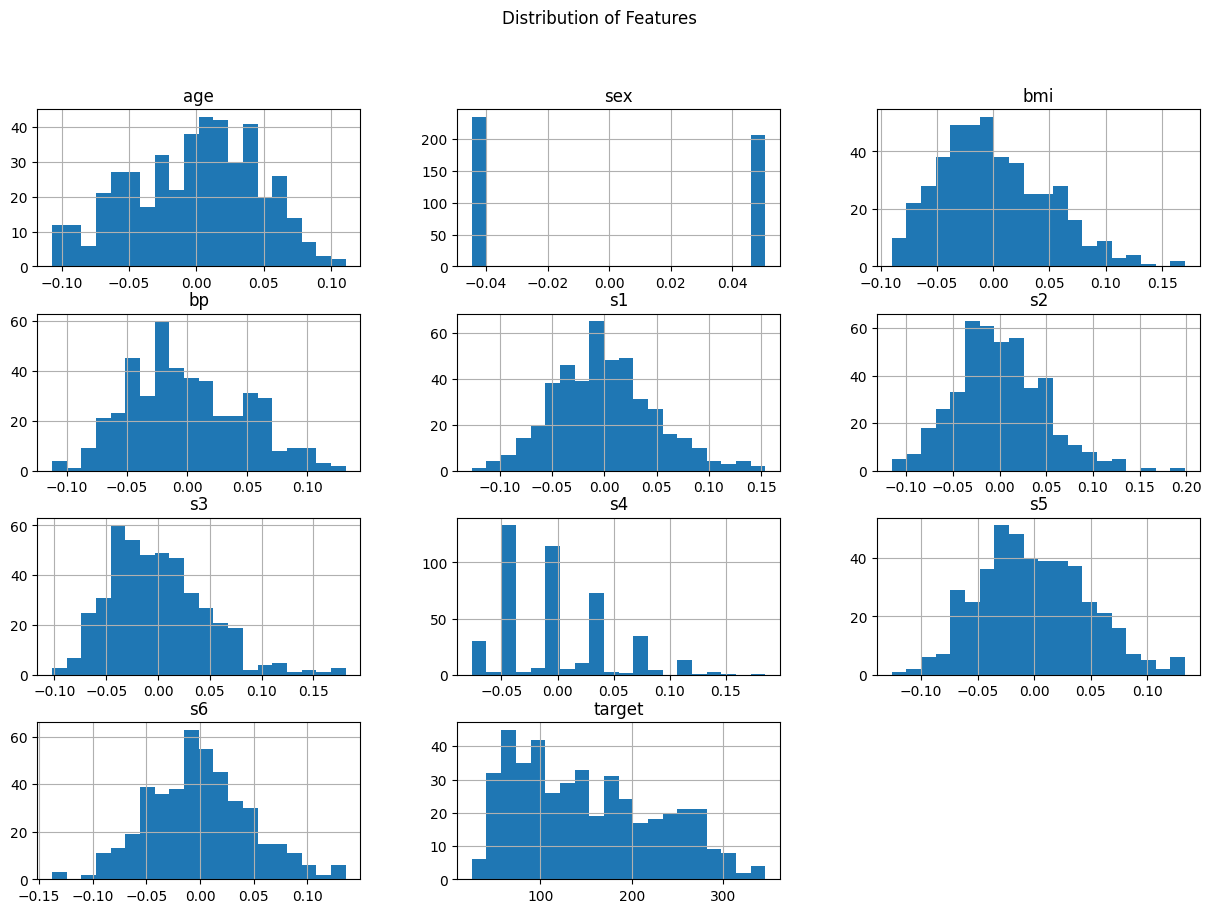

In [ ]:
# 각 Feature의 분포 확인
# 각 Feature가 어떻게 분포되어 있는지 시각화
data.hist(bins=20, figsize=(15,10))
plt.suptitle('Distribution of Features')
plt.show()

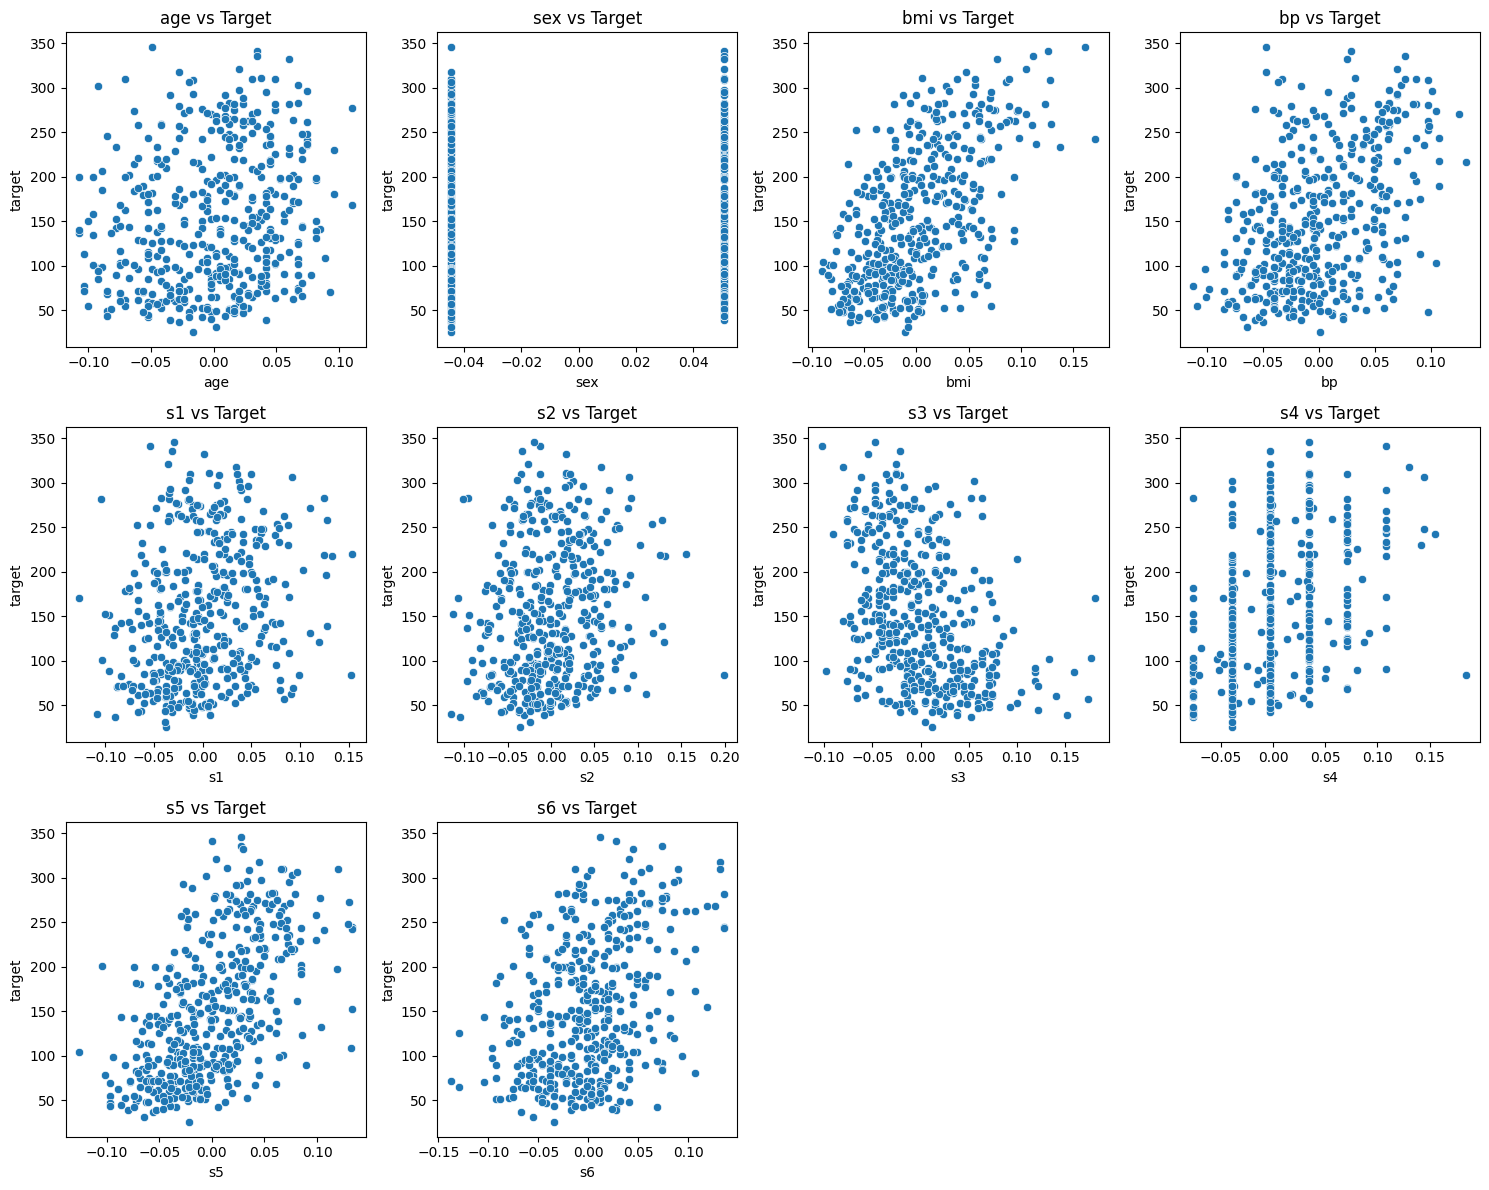

In [ ]:
# Feature와 Target 간의 관계 시각화
# scatter plot 그리기
plt.figure(figsize=(15, 12))
for i, column in enumerate(columns, 1):
    plt.subplot(3, 4, i)
    sns.scatterplot(x=data[column], y=data['target'])
    plt.title(f'{column} vs Target')
plt.tight_layout()
plt.show()

2. 데이터 분할


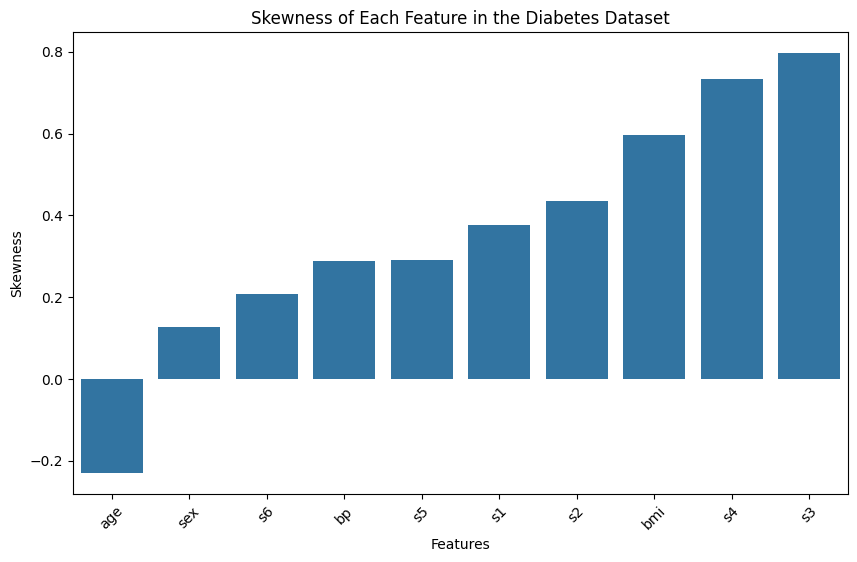

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Diabetes Dataset 로드 및 DataFrame으로 변환
diabetes_data = load_diabetes()
df = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)

# 각 feature의 skewness 계산
skew_values = df.apply(skew).sort_values()

# skewness 값 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=skew_values.index, y=skew_values.values)
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.title('Skewness of Each Feature in the Diabetes Dataset')
plt.xticks(rotation=45)
plt.show()

right tail skewness(오른쪽으로 긴 꼬리를 가진 비대칭 분포).

data값이 평균보다 큰 경우가 더 많은 상황. 따라서 각 feature는 비대칭적인 분포에 가까움.

데이터셋이 regression이라면, 로그 변환을 통해 비대칭적인 분포를 대칭에 가깝게 변환한 후에 모델을 학습하는 것이 성능 향상에 도움이 될 수 있음.

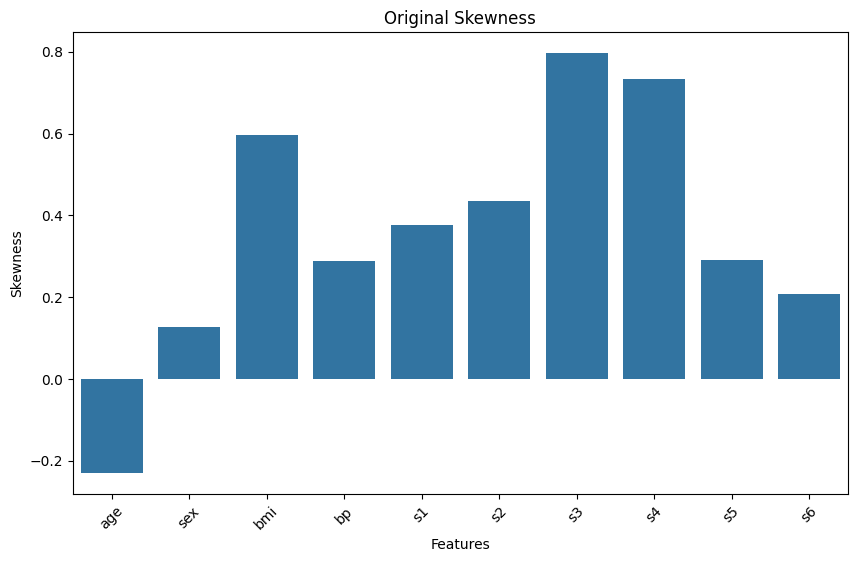

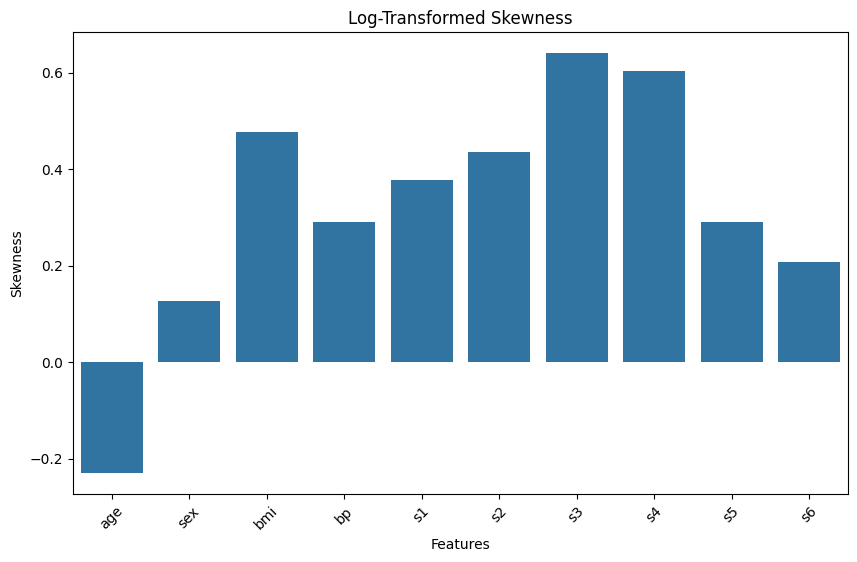

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터셋 로드 및 DataFrame으로 변환
diabetes_data = load_diabetes()
df = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)

# Skewness가 0.5 이상인 feature 찾기
skewed_features = df.columns[df.apply(lambda x: skew(x)) > 0.5]

# 로그 변환결과 저장할 DataFrame
df_log_transformed = df.copy()

# 로그 변환 적용
for feature in skewed_features:
    # 로그 변환 (값이 양수일 때만 적용 가능)
    df_log_transformed[feature] = np.log1p(df[feature])
    # log1p는 log(1 + x)를 계산해 0값 처리 가능

# 변환 전후 skewness 비교를 위해 plot_skewness 함수 정의
# 원본, 로그 변환된 데이터의 skewness 값을 막대 그래프로 시각화
def plot_skewness(df, title):
    skew_values = df.apply(skew)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=skew_values.index, y=skew_values.values)
    plt.xlabel('Features')
    plt.ylabel('Skewness')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# 원본 데이터와 변환 데이터의 skewness 비교 출력
plot_skewness(df, 'Original Skewness')
plot_skewness(df_log_transformed, 'Log-Transformed Skewness')

Diabetes Dataset은 regression이기 때문에, 랜덤분할이 더욱 적합. regression dataset은 target이 연속적이기 때문에 랜덤하게 데이터를 분할하는 방식이 더 효율적. 따라서, train_test_split을 사용하여 랜덤하게 분할.

계층화 분할은 주로 분류 문제에서 클래스 비율을 유지하기 위해 사용됨.

In [ ]:
# 데이터 분할하기
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

# Diabetes Dataset 로드
diabetes_data = load_diabetes()
X = diabetes_data.data
y = diabetes_data.target

# 랜덤 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 분할 결과 출력
print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (353, 10)
Test set size: (89, 10)


3. 모델 선택 및 학습

다중공선성(Multicollinearity) 확인하기

즉, feature 간 매우 높은 상관관계로 종속적인 관계를 만드는 것이 "다중공선성"

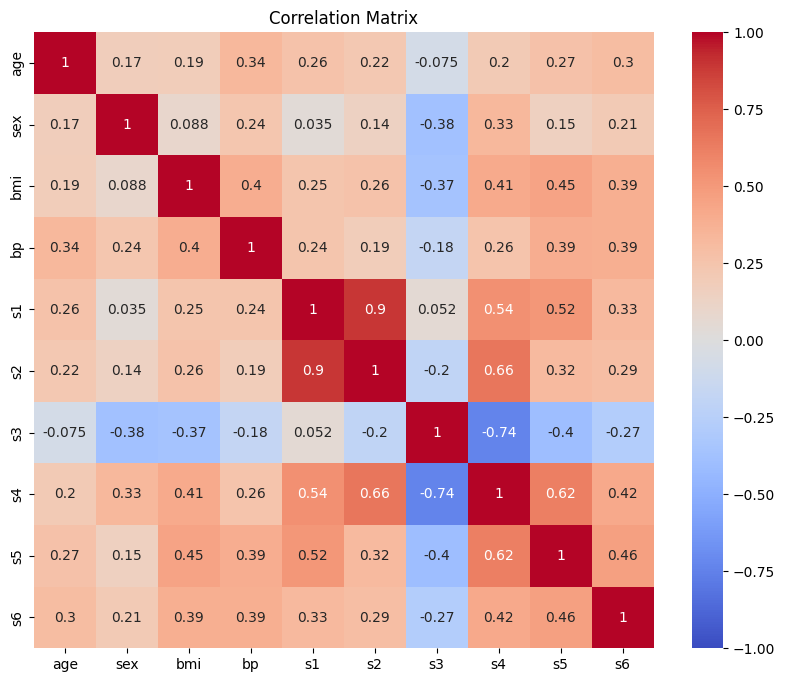

In [ ]:
# 상관행렬(Correlation Matrix) 확인하기
# 상관행렬: feature 간 상관계수를 계산결과를 나타낸 행렬.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Diabetes Dataset을 DataFrame으로 변환
data = pd.DataFrame(X, columns=diabetes.feature_names)

# 상관행렬 계산 및 시각화
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

|상관계수|>=0.8 인 경우, 다중공선성 존재한다고 판단

feature s1과 s2는 다중공선성을 가짐.

In [ ]:
# 분산 팽창 계수(Variance Inflation Factor)는 feature간 상관관계를 수치화하여 나타냄.

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = diabetes.feature_names
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

print(vif_data)

  feature        VIF
0     age   1.217307
1     sex   1.278071
2     bmi   1.509437
3      bp   1.459428
4      s1  59.202510
5      s2  39.193370
6      s3  15.402156
7      s4   8.890986
8      s5  10.075967
9      s6   1.484623


VIF>=10 인 경우, 다중공선성 존재한다고 판단

feature s1, s2, s3, s5는 다중공선성을 가짐.



dataset에 다중공선성 문제가 존재할 때.

선형 회귀와 달리 릿지 회귀(Ridge Regression)는

L2 정규화(제곱 페널티-L2 norm)를 통해 특정 feature의 가중치를 줄이므로,

모델이 전체 feature를 사용하면서도 과적합을 줄이는 효과가 있음.

=> Ridge Regression 모델을 사용하는 것이 적합하다고 판단할 수 있음.

Ridge Regression 모델의 최적의 알파값 찾기
* 알파값=규제 강도(regularization) 조절 하이퍼 파라미터
* 커질수록 모든 가중치에 대한 제약이 강해짐 -> 가중치가 더 작아짐 -> 지나치게 큰 알파는 과소적합 모델을 유도함.



Validation Curve를 활용해 여러 α값에 따른 학습 및 검증 오류 변화를 시각화

-> 특정 α 범위에서 검증 오류가 최소화되는 부분 관찰가능

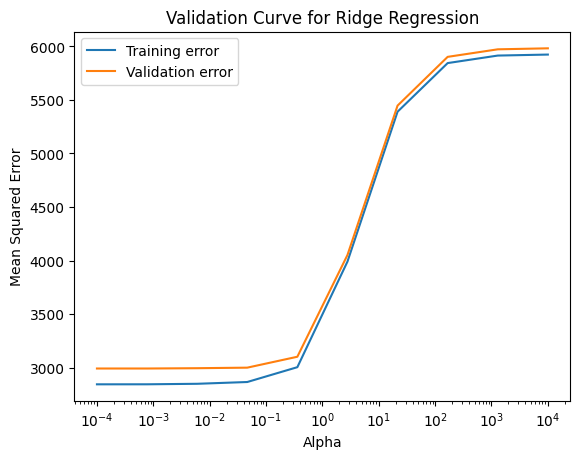

In [ ]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

alphas = np.logspace(-4, 4, 10)  # 0.0001부터 10,000까지 로그 스케일로 생성
train_scores, valid_scores = validation_curve(
    Ridge(), X, y, param_name="alpha", param_range=alphas, cv=5, scoring="neg_mean_squared_error"
)

plt.plot(alphas, -np.mean(train_scores, axis=1), label="Training error")
plt.plot(alphas, -np.mean(valid_scores, axis=1), label="Validation error")
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Validation Curve for Ridge Regression")
plt.show()

Training error, Validation error (검증 오류) 모두 α 값이 작을 때 더 낮은 값을 보임. 과적합이 적게 발생하는 상황.

α값이 너무 커지면(10^1) 훈련 오류와 검증 오류 급격히 증가. underfit 발생하는 전형적인 패턴, 지나치게 큰 α값으로 인해 모델이 데이터를 충분히 학습하지 못함.

10^-4 에서 10^-1에서는 훈련, 검증 오류의 값이 비교적 안정적. 해당 구간에서 α 값을 찾는 것이 최적.

In [ ]:
# GridSearchCV로 최적의 RIdge 모델 알파 값을 greedy하게 탐색
from sklearn.model_selection import GridSearchCV

# Ridge 모델에 대한 알파 값 범위 설정
ridge_alphas = {'alpha': [0.1, 0.3, 0.5, 0.7, 0.9]}
ridge_search = GridSearchCV(
    Ridge(),
    ridge_alphas,
    cv=5,
    scoring=['neg_mean_squared_error', 'r2'],
    refit='neg_mean_squared_error',  # 'neg_mean_squared_error'를 기준으로 최적 모델 선택
    return_train_score=True
)
ridge_search.fit(X, y)

print("Best alpha for Ridge based on MSE:", ridge_search.best_params_)
print("Best Ridge model MSE:", -ridge_search.best_score_)
print("Corresponding Ridge model R^2:", ridge_search.cv_results_['mean_test_r2'][ridge_search.best_index_])

Best alpha for Ridge based on MSE: {'alpha': 0.1}
Best Ridge model MSE: 3006.7057011496754
Corresponding Ridge model R^2: 0.47988210231953665


In [3]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# 모델 초기화
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()

# 선형 회귀 학습 및 평가
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
print("Linear Regression")
print("MSE:", mean_squared_error(y_test, y_pred_linear))
print("MAE:", mean_absolute_error(y_test, y_pred_linear))
print("R2 Score:", r2_score(y_test, y_pred_linear))

# 최적 alpha 값 찾기 및 평가
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)
y_pred_ridge = ridge_grid.predict(X_test)
print("\nRidge Regression (Best alpha: {})".format(ridge_grid.best_params_['alpha']))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("R2 Score:", r2_score(y_test, y_pred_ridge))

# 최적 alpha 값 찾기 및 평가
lasso_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
lasso_grid = GridSearchCV(lasso_model, lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)
y_pred_lasso = lasso_grid.predict(X_test)
print("\nLasso Regression (Best alpha: {})".format(lasso_grid.best_params_['alpha']))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("R2 Score:", r2_score(y_test, y_pred_lasso))

Linear Regression
MSE: 3403.8877929322553
MAE: 47.62636803032458
R2 Score: 0.3908118647948903

Ridge Regression (Best alpha: 0.1)
MSE: 3356.280253757379
MAE: 47.214176271755726
R2 Score: 0.39933210687568577

Lasso Regression (Best alpha: 0.1)
MSE: 3361.8191859700573
MAE: 47.535983985729175
R2 Score: 0.39834081339278204


In [4]:
# Ridge Regression 모델을 사용하여 K-Fold 교차 검증
# 데이터를 여러 번(폴드 수만큼) 나누어 각각의 폴드에서 모델을 학습 및 평가
# 최종적으로 각 폴드에서 평가된 점수를 평균 내어 모델의 성능을 확인.

import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.datasets import load_diabetes

# 데이터 로드
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# K-Fold 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 데이터를 5개의 폴드로 분할
# shuffle=True: 데이터를 무작위로 섞어 분할. 편향을 줄이는 데 도움
# random_state=42: 재현성을 위해 설정. 고정된 시드 -> 같은 결과
# 모델 초기화
model = Ridge(alpha=0.1)

# 각 폴드의 MSE와 R^2 점수를 저장할 리스트
mse_scores = []
mae_scores = []
r2_scores = []

# K-Fold 교차 검증
for train_index, test_index in kf.split(X):
    # kf.split(X)를 통해 각 폴드의 train dataset, test dataset의 index를 구함
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 모델 학습
    model.fit(X_train, y_train)

    # 예측 with test dataset
    y_pred = model.predict(X_test)

    # MSE와 R^2 점수 계산
    mse_scores.append(mean_squared_error(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))


# 평균 MSE와 R^2 점수 출력
print("Average MSE from K-Fold Cross-Validation:", np.mean(mse_scores))
print("Average MAE from K-Fold Cross-Validation:", np.mean(mae_scores))
print("Average R^2 Score from K-Fold Cross-Validation:", np.mean(r2_scores))

Average MSE from K-Fold Cross-Validation: 3013.810607770459
Average MAE from K-Fold Cross-Validation: 44.49645464858337
Average R^2 Score from K-Fold Cross-Validation: 0.4790759615259203
